In [3]:
!pip install -q opencv-python matplotlib


In [1]:
import os, cv2, csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/var/folders/96/_p6376jd0_scrpsdsmh4v5dr0000gn/T/ipykernel_19175/673466687.py:72: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


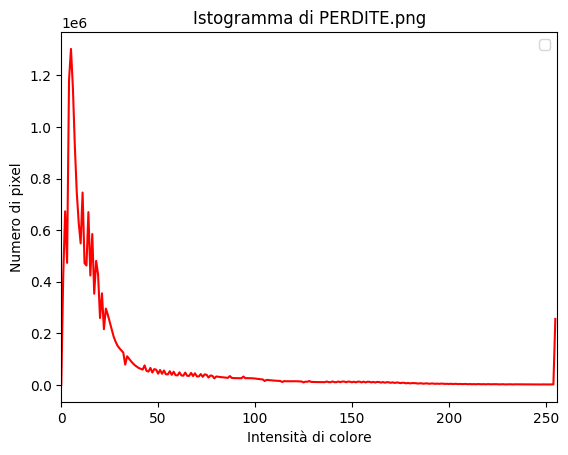

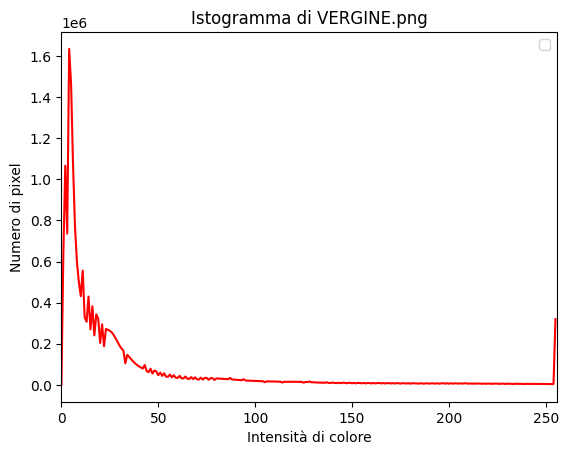

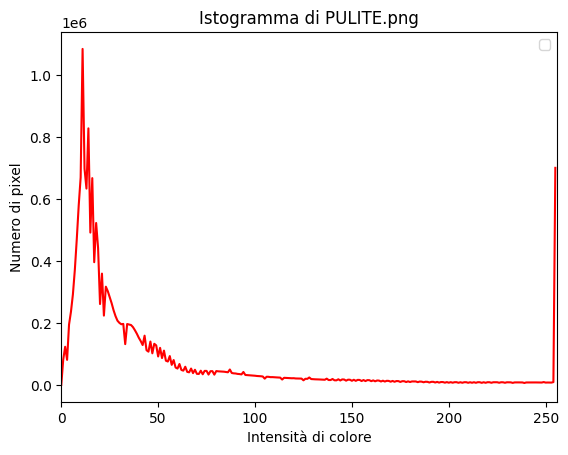

Distanza totale tra PERDITE.png e VERGINE.png: 0.04381685509619171
Distanza totale tra PERDITE.png e PULITE.png: 0.2749964434958394
Distanza totale tra VERGINE.png e PULITE.png: 0.43017744657422397


In [ ]:

from cv2 import GaussianBlur


def plot_rgb_histogram(image_path):
    """Genera un istogramma RGB per una singola immagine."""
    #image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converti da BGR a RGB
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    hist_gray = cv2.calcHist([image], [0], None, [256], [0, 256])
    
    # Separare i canali RGB
    #r, g, b = cv2.split(image)
    ''' RESIZING
    # Set rows and columns 
    # lets downsize the image using new  width and height
    down_width = 300
    down_height = 200
    down_points = (down_width, down_height)
    resize_down = cv2.resize(image, down_points, interpolation= cv2.INTER_LINEAR)
    # Display images
    cv2.imshow('Resized Down by defining height and width', resized_down)
    cv2.waitKey()
    cv2.imshow('Resized Up image by defining height and width', resized_up)
    cv2.waitKey()
    cv2.destroyAllWindows()
    
    
    ##################################################################### GAUSSIAN BLUR AND LAPLACIAN
    ddepth = cv2.CV_16S
    kernel_size = 3
    window_name = "Laplace Demo"
    # [variables]
    # [load]
    imageName = "dataset/distanzeProva/PULITE.png"
    src = cv2.imread(cv2.samples.findFile(imageName), cv2.IMREAD_COLOR) # Load an image
    # Check if image is loaded fine
    if src is None:
        print ('Error opening image')
        print ('Program Arguments: [image_name -- default lena.jpg]')
        return -1
    # [load]
    src = cv2.GaussianBlur(src, (3, 3), 0)
    # [reduce_noise]
    # [convert_to_gray]
    # Convert the image to grayscale
    src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    # [convert_to_gray]
    # Create Window
    cv2.namedWindow(window_name, cv2.WINDOW_AUTOSIZE)
    # [laplacian]
    # Apply Laplace function
    dst = cv2.Laplacian(src_gray, ddepth, ksize=kernel_size)
    # [laplacian]
    # [convert]
    # converting back to uint8
    abs_dst = cv2.convertScaleAbs(dst)
    # [convert]
    # [display]
    cv2.imshow(window_name, abs_dst)
    cv2.waitKey(0)
    ####################################################################
    '''
    plt.figure()
    plt.title(f'Istogramma di {os.path.basename(image_path)}')
    plt.xlabel('Intensità di colore')
    plt.ylabel('Numero di pixel')
    
    plt.plot(hist_gray, color='r')
    
    plt.xlim([0, 256])
    plt.legend()
    plt.show()
    return hist_gray

def calculate_histogram_distance(hist1, hist2, method=cv2.HISTCMP_CORREL):
    """Calcola la distanza tra due istogrammi usando il metodo specificato."""
    #return cv2.compareHist(hist1, hist2, method)
    return cv2.compareHist(hist1, hist2, method)

def process_images_from_folder(folder_path):
    """Processa tutte le immagini in una cartella e calcola la distanza tra gli istogrammi RGB."""
    if not os.path.exists(folder_path):
        print("Errore: La cartella specificata non esiste.")
        return
    
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('png', 'jpg', 'jpeg', 'webp'))]
    if not image_files:
        print("Nessuna immagine trovata nella cartella.")
        return
    
    histograms_list = []
    
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        hist = plot_rgb_histogram(image_path)  
        histograms_list.append((image_file, hist))
    
    file_names = []
    # Calcolare la distanza tra gli istogrammi delle immagini
    for i in range(len(histograms_list)):
        for j in range(i + 1, len(histograms_list)):
            image1, hist1 = histograms_list[i]
            image2, hist2 = histograms_list[j]
            
            # Calcoliamo la distanza tra ogni canale (r, g, b)
            total_distance = 0
            total_distance += calculate_histogram_distance(hist1, hist2)
            total_distance = 1 - total_distance

            print(f"Distanza totale tra {image1} e {image2}: {total_distance}")
        file_names.append[image1]

    matrice = distance_matrix(punti, punti)

    # Convertiamo in DataFrame per salvarlo in CSV
    df = pd.DataFrame(matrice, index=file_names, columns=file_names)
    df.to_csv("matrice_distanze.csv")

# Esegui il codice per una cartella specifica
folder_path = os.path("datasetSuddiviso/UV1")
#folder_path = "/Users/filipporeucci/Desktop/cani"
process_images_from_folder(folder_path)

